# Modelo linear generalizado - Distribuição binomial

Adaptado de http://wiki.icmc.usp.br/images/6/69/Exemplo-binomial-2023.pdf

Um modelo binomial com função de ligação canônica é ajustado aos dados do Exemplo 5, pag. 16 do
livro Demétrio, C. G. B. (2002), Modelos Lineares Generalizados em Experimentação Agronômica, ESALQ
(https://docs.ufpr.br/~niveam/micro%20da%20sala/bom/Apostila%20de%20MLG.pdf).

O modelo relaciona a probabilidade de que um inseto (pulgão) morra com a dose do inseticida (rotenone).
Para cada dose foram utilizados m insetos no experimento dos quais y morreram após um certo tempo de
exposição ao inseticida. Seis doses diferentes foram testadas. Esse tipo de estudo é conhecido como ensaio
dose-resposta.

A linguagem Python é utilizada no exemplo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy.stats import logistic
from scipy.stats import norm

In [2]:
dose = np.array([10.2, 7.7, 5.1, 3.8, 2.6, 0.0])
m = np.array([50, 49, 46, 48, 50, 49])
y = np.array([44, 42, 24, 16, 6, 0])
resposta = np.column_stack((y, m - y))
pmortos = y / m

O objeto resposta representa a variável resposta e tem duas colunas: número de insetos mortos e número de
insetos sobreviventes. O número de insetos no estudo foi

In [3]:
np.sum(m)

292

Os dados neste exemplo estão na forma agregada. Na forma bruta terîamos um vetor de respostas binárias
$y$ (292 × 1) e um vetor $x$ (292 × 1) com os valores das doses, sendo que 10,2 estaria repetido 50 vezes, . . . ,
0,0 estaria repetido 49 vezes.

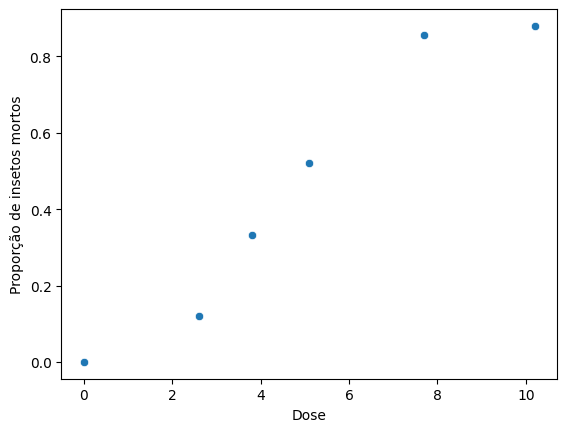

In [4]:
sns.scatterplot(x=dose, y=pmortos)
plt.xlabel("Dose")
plt.ylabel("Proporção de insetos mortos")
plt.show()

In [5]:
model = sm.GLM(resposta, sm.add_constant(dose), family=sm.families.Binomial())
mcan = model.fit()
mcan.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           ['y1', 'y2']   No. Observations:                    6
Model:                            GLM   Df Residuals:                        4
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14.739
Date:                Sat, 09 Sep 2023   Deviance:                       10.258
Time:                        11:43:37   Pearson chi2:                     9.70
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2257      0.370     -8.720      0.000      -3.951      -2.501
x1             0.6051      0.068      8.924      0.000       0.472       0.738
==============================================================================
"""

O objeto *mcan* contém diversos resultados do ajuste

In [6]:
print(mcan.__dict__['__doc__'])


    Class to contain GLM results.

    GLMResults inherits from statsmodels.LikelihoodModelResults

    Attributes
    ----------
    df_model : float
        See GLM.df_model
    df_resid : float
        See GLM.df_resid
    fit_history : dict
        Contains information about the iterations. Its keys are `iterations`,
        `deviance` and `params`.
    model : class instance
        Pointer to GLM model instance that called fit.
    nobs : float
        The number of observations n.
    normalized_cov_params : ndarray
        See GLM docstring
    params : ndarray
        The coefficients of the fitted model.  Note that interpretation
        of the coefficients often depends on the distribution family and the
        data.
    pvalues : ndarray
        The two-tailed p-values for the parameters.
    scale : float
        The estimate of the scale / dispersion for the model fit.
        See GLM.fit and GLM.estimate_scale for more information.
    stand_errors : ndarray
        Th

As proporções de insetos mortos e o modelo ajustado são mostrados na figura abaixo

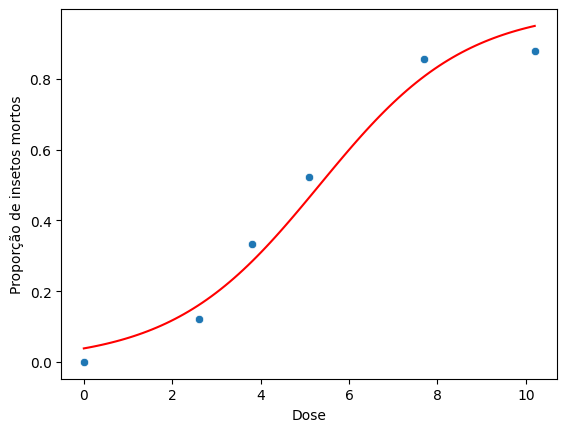

In [7]:
b1 = mcan.params[0]
b2 = mcan.params[1]

X = np.linspace(dose.min(), dose.max(), 100)

sns.scatterplot(x=dose, y=pmortos)
plt.xlabel("Dose")
plt.ylabel("Proporção de insetos mortos")
sns.lineplot(x=X, y=logistic.cdf(b1 + b2*X), color="red")
plt.show()

In [8]:
## Intervalos de confiança assintóticos
# Aproximação pela dist. normal inclusa no resumo do modelo

# Intervalos de confiança (veros. perfilada)
# (por fazer)

## Funções de ligação
As funções de ligação logito (regressão logística), probito e complemento log-log são bastante utilizadas no
modelo binomial. As expressões são dadas abaixo, sendo que $\eta = x > \beta \in R$ é o preditor linear, $\pi = \mu / m$ e $\Phi$ denota a função distribuição acumulada da distribuição normal $(0, 1)$.

$$\log\left(\frac{\pi}{1-\pi}\right) = \eta, \quad \pi = \frac{e^\eta}{1 + e^\eta}: \quad \text{logito},\tag{1}$$

$$\Phi^{-1} \left(\pi\right) = \eta, \quad \pi = \Phi \left(\eta\right): \quad \text{probito},\tag{2}$$

$$\log\left(-\log\left(1-\pi\right)\right) = \eta, \quad \pi = 1- \exp\left(-\exp\left(\eta\right)\right): \quad \text{complemento log-log}.\tag{3}$$

As funções de ligação logito e probito são simétricas, significando que $\pi\left(\eta\right) = 1 - \pi\left(-\eta\right)$ para todo $\eta \in \mathbb{R}$. Com a função de ligação complemento log-log, temos $\pi\left(\eta\right) \geq 1 - \pi\left(-\eta\right)$ para todo $\eta > 0$.

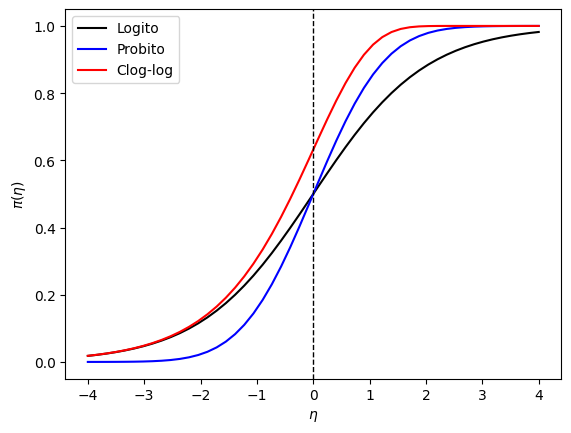

In [9]:
## Inversa das funções de ligação
# Complemento log-log (Clog-log)
def ploglog(x):
    return(1 - np.exp(-np.exp(x)))

X = np.linspace(-4, 4, 50)

sns.lineplot(x=X, y=logistic.cdf(X), color="black", label="Logito")
sns.lineplot(x=X, y=norm.cdf(X), color="blue", label="Probito")
sns.lineplot(x=X, y=ploglog(X), color="red", label="Clog-log")
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.xlabel(r"$\eta$")
plt.ylabel(r"$\pi\left(\eta\right)$")
plt.show()

**Nota 1**. Modelos com as funções de ligação probito e complemento log-log são ajustados com os comandos
abaixo.

In [10]:
mprob = sm.GLM(resposta, sm.add_constant(dose), family=sm.families.Binomial(link=sm.families.links.Probit()))
mloglog = sm.GLM(resposta, sm.add_constant(dose), family=sm.families.Binomial(link=sm.families.links.CLogLog()))

## Razão de chances

Se $\pi$ denota a probabilidade de um evento occorrer, $C = \pi / (1 − \pi)$ é a chance (*odds*) de que o evento ocorra, notando que $C$ é uma função monótona crescente em $\pi$. Para as funções de ligação nas expressões acima, obtemos

$$C = \frac{\frac{e^{\eta}}{1 + e^{\eta}}}{1 − \frac{e^{\eta}}{1 + e^{\eta}}} = e^{\eta}\tag{4}$$
$$C = \frac{\Phi(\eta)}{1 − \Phi(\eta)} \quad \text{e}$$
$$C = \frac{1 − \exp ( − \exp(−\eta))}{\exp ( − \exp(−\eta))}.$$

Considere $x_2 \neq x_1$ (de modo que $\eta_2 = x_2^T\beta \neq \eta_1 = x_1^T \beta$) com chances $C_2$ e $C_1$. A razão de chances (*odds ratio*) é dada por $RC = C_2/C_1$. Tomando a função de ligação logito, da expressão (4) resulta

$$RC = \frac{e^{\eta_2}}{e^{\eta_1}} = e^{{\eta_2}−{\eta_1}} = \exp \left(\left(x_2 − x_1\right)^T\beta\right). \tag{5}$$

Retornando ao modelo binomial, temos $Y \sim \text{binomial}\left(m, \pi\right)$ e $E(Y) = \mu = m\pi$. De acordo com o modelo e usando a função de ligação logito dada por (1), temos que

$$\log\left(\frac{\mu}{m-\mu}\right) = \log\left(\frac{\pi}{1-\pi}\right) = \beta_1 + \beta_1\cdot dose. \tag{6}$$

O lado esquerdo de (6) é chamado de logito da probabilidade $\pi$, que é representado por uma função linear dos coeficientes $\beta.$

Em seguida comparamos dois valores de doses, dose1 e dose2, sendo que $dose_2 = dose_1 + 1$. Logo, $x_1 = (1, dose_1)^T$, $x_2 = (1, dose_2)^T = (1, dose_1 + 1)^T$ e $x_2 − x_1 = (0, 1)^T$. A partir de (5) obtemos

$$RC = \exp\left(\left(0,1\right)\beta\right) = \exp\left(0\cdot \beta_1 + 1\cdot \beta_2\right) = e^{\beta_2}.$$

Portanto, a chance de um inseto morrer é multiplicada por $e^{\beta_2}$ quando a dose é aumentada em uma unidade, qualquer que seja a dose. Desta forma, o coeficiente da variável $dose \left(\beta_2\right)$ tem um interpretação.

Em um modelo com mais de uma covariável ($p > 2$), a interpretação de cada coeficiente $\beta_j, j\neq 1$, é semelhante tomando-se a covariável $x_j$ acrescida de uma unidade $\left(x_j+1\right)$ e mantendo-se constantes os valores de todas as demais covariáveis.


In [11]:
print(f"Razão de chances: {np.exp(b2)}")

Razão de chances: 1.8314821473864786


**Nota 2.** Apresente um intervalo de confiança para a razão de chances.

## Dose letal

É de interesse estimar as doses de inseticida que eliminam $50\%$ e $90\%$ dos insetos, denotadas por $DL_{50}$ e $DL_{90}$, respectivamente. Segue de (6) que

$$dose = \frac{\log\left(\frac{\pi}{1-\pi}\right)-\beta_1}{\beta_2} \tag{7}$$

Da expressão (7) obtemos

$$DL_{50} = \frac{\log\left(\frac{0.5}{1-0.5}\right)-\beta_1}{\beta_2} = -\frac{\beta_1}{\beta_2} \tag{8}$$

e

$$DL_{90} = \frac{\log\left(\frac{0.9}{1-0.9}\right)-\beta_1}{\beta_2} = \frac{2.20 - \beta_1}{\beta_2} \tag{8}$$

In [12]:
def DL(prob):
    return((np.log(prob/(1-prob)) - b1) / b2)

print(f"DL50 e DL90 = {DL(np.array([0.5, 0.9]))}")

DL50 e DL90 = [5.33056864 8.96159126]


Aplicamos o método delta para obter um intervalo de confiança de $95\%$ para a dose leta. Calculamos

$$\frac{\partial}{\partial\beta} DL = \left(-\frac{1}{\beta_2}, -\frac{\log\left(\frac{\pi}{1-\pi}\right)-\beta_1}{\beta_2^2}\right)^T = -\frac{1}{\beta_2} \left(1,DL\right)^T$$

e

$$cov\left(DL\right) = \frac{\partial}{\partial\beta^T} DL \cdot \text{cov}\left(\widehat{\beta}\right) \cdot \frac{\partial}{\partial\beta} DL,$$

sendo que um estimador de $\text{cov}\left(\widehat{\beta}\right)$ é dado pelo método *cov_params*.

In [13]:
# IC de 95% para DL50 (método delta)
pDL = 0.5
derivDL = np.array([1, DL(pDL)]) / b2
epDL = np.sqrt(np.transpose(derivDL) @ mcan.cov_params() @ derivDL)
z = norm.ppf((1+0.95)/2)

print(f"IC DL{100*pDL:g}: {[DL(pDL) - z*epDL, DL(pDL) + z*epDL]}")

IC DL50: [4.809177606853541, 5.85195968088946]


**Nota 3.** Refaça o exemplo em linguagem Julia.